In a Neutron Star (NS) the rest-mass density $\rho$ is related to the neutron number denisty $n$ via $\rho=m_n n_n$, where $m_n$ is the rest mass of a neutron (we are assuming the NS to be composed only of neutrons).
Let's then compute the value of $n_n$ assuming the NS having a mean density of $10^{14}$ g cm$^{-3}$:

In [1]:
mn=1.67e-24
rho=1.0e14
n=rho/mn
print(n)

5.9880239520958085e+37


We also know that
$n_n=\int_0^{p_F}\frac{8\pi}{h^3}p^2dp=\frac{8\pi}{3h^3}p_F^3$
where $p_F$ is the Fermi momentum and $h$ the Planck's constant.
Therefore from the neutron number density we can compute the Fermi momentum $p_F=\frac{h}{2}\left (\frac{3 n_n}{\pi}\right)^{1/3}$

In [2]:
import math
h=6.63e-27
pf=0.5*h*(3*n/math.pi)**(1.0/3.0)
print(pf)

1.2771301853598721e-14


Now that we have computed the Fermi momentum, we can compute the Fermi energy $E_F$ for a typical NS,
$E_F=\left( p_F^2 c^2 + m_n^2 c^4\right)^{1/2}$, where $c$ the speed of light in vacuum.

In [3]:
c=3.0e10
Ef=math.sqrt(pf**2 * c**2 + mn**2 * c**4)
print(Ef) #this is in erg
print(Ef/1.60184e-6) #we print this also in MeV, where 1MeV = 1.60184e-6 erg (remember that mn*c^2 is ~940 MeV)

0.0015510656130325888
968.3024603160046


Now that we got the Fermi energy we can plot the Fermi-Dirac distribution for different values of the temperature and check if a step function is a good approximation. The Fermi-Dirac distribution is $f(E)=\frac{1}{{\rm exp}\left(\frac{E-E_F}{k_bT}\right)+1}$

In [4]:
import numpy as np
kb=1.38e-16 #Boltzmann's constant
energy=np.linspace(0, 2.01*Ef, num=101)
T=1.0e7 #this is in Kelvin
f=1.0/(np.exp((energy-Ef)/(kb*T))+1.0)

<ipython-input-4-59a6d664d46c>:5: RuntimeWarning: overflow encountered in exp
  f=1.0/(np.exp((energy-Ef)/(kb*T))+1.0)


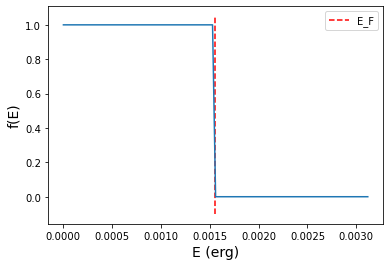

In [5]:
import matplotlib.pyplot as plt
plt.plot(energy, f)
plt.xlabel('E (erg)', fontsize=14)
plt.ylabel('f(E)', fontsize=14)
plt.vlines(Ef, -0.1, 1.05, colors='r', linestyles='dashed', label='E_F')
plt.legend()
plt.show()

Note: I took some of the fundamental constant values from https://ned.ipac.caltech.edu/level5/Glossary/lang_formulae.html